# International domestic

In [ ]:
!pip3 install pm4py==2.2.24

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pm4py
import matplotlib.pyplot as plt
import math
from scipy.stats import pareto

In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
domestic_declarations_log = xes_importer.apply('/content/DomesticDeclarations.xes_')
international_declarations_log = xes_importer.apply('/content/InternationalDeclarations.xes_')

parsing log, completed traces ::   0%|          | 0/10500 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

In [ ]:
print(len(domestic_declarations_log))
print(len(international_declarations_log))

10500
6449


In [ ]:
from pm4py.algo.filtering.log.variants import variants_filter

from pm4py.statistics.traces.generic.log import case_statistics

In [ ]:

international_declarations_variants = variants_filter.get_variants(international_declarations_log)
international_declarations_variants_count = case_statistics.get_variant_statistics(international_declarations_log)

In [ ]:
len(international_declarations_variants_count)

753

In [ ]:
sum = 0
for variant in international_declarations_variants_count:
  sum+=1
print(sum)

753


In [ ]:
rejected = 0
for variant in international_declarations_variants_count:
  if "REJECTED" in variant['variant']:
      rejected += variant['count']
print(rejected)

1755


In [ ]:
supervisor_approved = 0
for variant in international_declarations_variants_count:
  if 'Declaration FINAL_APPROVED by SUPERVISOR' in variant['variant']:
      supervisor_approved += variant['count']
print(supervisor_approved)

5961


In [ ]:
case_handled = 0
for variant in international_declarations_variants_count:
    if "Handled" in variant['variant']:
      case_handled += variant['count']
print(case_handled)

6187


In [ ]:
not_approved = 0
for variant in international_declarations_variants_count:
  if "APPROVED" not in variant['variant']:
      not_approved += variant['count']
print(not_approved)

20


In [ ]:
double_payed = 0
for variant in international_declarations_variants_count:
  if variant['variant'].count('Payment Handled') > 1:
      double_payed += variant['count']
print(double_payed)

0


In [ ]:
resubmitted = 0
for variant in international_declarations_variants_count:
  if variant['variant'].count('SUBMITTED') > 1:
      resubmitted += variant['count'] * (variant['variant'].count('SUBMITTED') - 1)
print(resubmitted)

7915


In [ ]:

international_declarations_variants = pm4py.get_variants(international_declarations_log)
international_declarations_df = pd.DataFrame.from_dict(international_declarations_variants_count)
international_declarations_df

/usr/local/lib/python3.8/dist-packages/pm4py/stats.py:219: UserWarning: pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.
  warnings.warn('pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.')


,variant,count
0,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",1369
1,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",624
2,"Permit SUBMITTED by EMPLOYEE,Permit FINAL_APPR...",361
3,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",311
4,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",254
...,...,...
748,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
749,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
750,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1
751,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",1


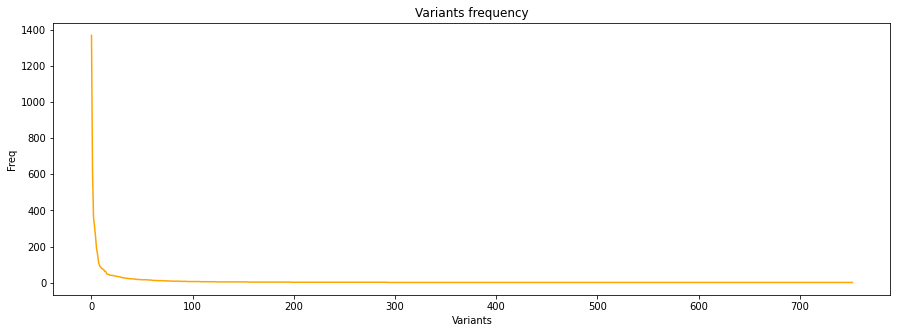

In [ ]:

variant = international_declarations_df.index
frequency = international_declarations_df['count']
freq_log = [math.log(i,2) for i in frequency ]
fig = plt.figure(figsize = (15,5))
plt.plot(variant,frequency, color = 'orange')
plt.xlabel('Variants')
plt.ylabel('Freq')
plt.title('Variants frequency')
plt.show()

In [ ]:
from pm4py.objects.conversion.log import converter as log_converter
international_declarations_df = log_converter.apply(international_declarations_log, variant=log_converter.Variants.TO_DATA_FRAME)
p = international_declarations_df.groupby('case:concept:name').agg(
Activity = ('concept:name', 'count'),\
Activity_list = ('concept:name', lambda x: ','.join(x) ),\
Resource = ('org:resource', 'nunique'),\
Duration = ('time:timestamp', lambda x: x.max()- x.min()),\
)
p

,Activity,Activity_list,Resource,Duration
case:concept:name,,,,
declaration 1002,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,39 days 05:35:41
declaration 10024,12,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,62 days 02:39:44
declaration 10026,12,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,62 days 02:39:44
declaration 10046,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,86 days 02:38:23
declaration 10069,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,8 days 01:03:09
...,...,...,...,...
declaration 9934,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,52 days 04:56:43
declaration 9945,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,49 days 02:16:33
declaration 9955,12,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,93 days 06:46:03


In [ ]:
import datetime
from datetime import timedelta
from pm4py.objects.log.util import dataframe_utils
p_sorted = dataframe_utils.convert_timestamp_columns_in_df(p)
p_sorted = p.sort_values('Duration',ascending=True)
p_sorted['Duration'] < timedelta(days=100)
p_sorted

,Activity,Activity_list,Resource,Duration
case:concept:name,,,,
declaration 28965,10,"Start trip,Permit SUBMITTED by EMPLOYEE,Permit...",2,6 days 17:31:11
declaration 81906,8,"Permit SUBMITTED by EMPLOYEE,Permit FINAL_APPR...",2,6 days 20:52:15
declaration 34709,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,7 days 01:21:22
declaration 146876,7,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",2,7 days 05:45:56
declaration 30793,10,"Permit SUBMITTED by EMPLOYEE,Permit APPROVED b...",2,7 days 07:41:11
...,...,...,...,...
declaration 143578,6,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",2,458 days 08:39:42
declaration 143644,12,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",2,458 days 11:42:47
declaration 143637,6,"Declaration SUBMITTED by EMPLOYEE,Declaration ...",2,458 days 14:12:24


In [ ]:
len(international_declarations_log)

6449

In [ ]:

international_declarations_log_f = pm4py.filter_start_activities(international_declarations_log, ['Declaration SUBMITTED by EMPLOYEE','Permit SUBMITTED by EMPLOYEE','Start trip'])
international_declarations_log_f = pm4py.filter_end_activities(international_declarations_log,['Payment Handled','End trip','Declaration REJECTED by EMPLOYEE'])

international_declarations_log_f = pm4py.filter_event_attribute_values(international_declarations_log, "concept:name", ['Declaration APPROVED by SUPERVISOR',
 'Declaration FINAL_APPROVED by DIRECTOR',
 'Declaration REJECTED by BUDGET OWNER',
 'Declaration REJECTED by DIRECTOR',
 'Declaration REJECTED by MISSING',
 'Declaration REJECTED by PRE_APPROVER',
 'Declaration REJECTED by SUPERVISOR',
 'Declaration SAVED by EMPLOYEE',
 'Permit REJECTED by ADMINISTRATION',
 'Permit REJECTED by BUDGET OWNER',
 'Permit REJECTED by DIRECTOR',
 'Permit REJECTED by EMPLOYEE',
 'Permit REJECTED by MISSING',
 'Permit REJECTED by PRE_APPROVER',
 'Permit REJECTED by SUPERVISOR'], level="case", retain=False)
print("filtered items: ",len(international_declarations_log) , len(international_declarations_log_f))

filtered items:  6449 5596


In [ ]:
international_declarations_log_f

[{'attributes': {'Permit travel permit number': 'travel permit number 76456', 'DeclarationNumber': 'declaration number 76458', 'Amount': 39.66456144659199, 'RequestedAmount': 39.66456144659199, 'Permit TaskNumber': 'UNKNOWN', 'Permit BudgetNumber': 'budget 922', 'OriginalAmount': 39.66456144659199, 'Permit ProjectNumber': 'UNKNOWN', 'concept:name': 'declaration 76457', 'Permit OrganizationalEntity': 'organizational unit 65458', 'travel permit number': 'travel permit number 76456', 'Permit RequestedBudget': 41.613444658859, 'id': 'declaration 76457', 'Permit ID': 'travel permit 76455', 'Permit id': 'travel permit 76455', 'BudgetNumber': 'budget 144133', 'Permit ActivityNumber': 'activity 46005', 'AdjustedAmount': 39.66456144659199}, 'events': [{'id': 'rv_travel permit 76455_6', 'org:resource': 'STAFF MEMBER', 'concept:name': 'Start trip', 'time:timestamp': datetime.datetime(2016, 10, 5, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'org:role': 'EMPLOYEE', 'case:Perm

/usr/local/lib/python3.8/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
<ipython-input-22-d748a84b3a71>:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  _ = pn_visualizer.apply(alpha, alpha_initial_marking, alpha_final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=international_declarations_log_f)


replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

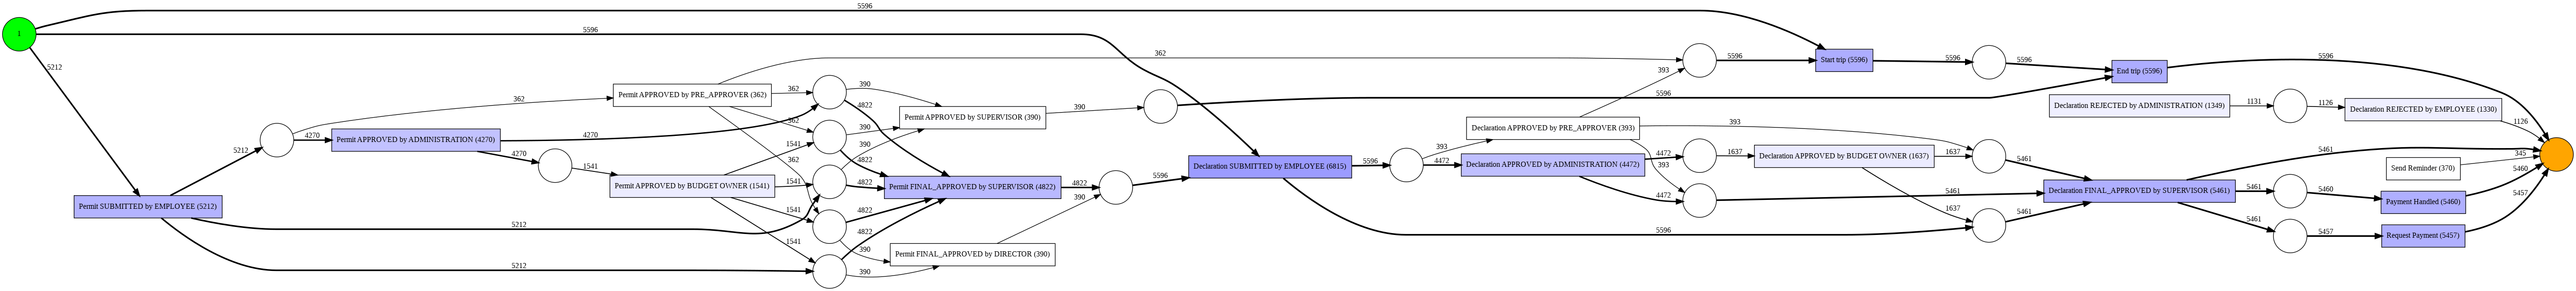

In [ ]:

from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer

alpha, alpha_initial_marking, alpha_final_marking = alpha_miner.apply(international_declarations_log_f)
_ = pn_visualizer.apply(alpha, alpha_initial_marking, alpha_final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=international_declarations_log_f)
pn_visualizer.view(_)

In [ ]:

from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness_alpha = replay_fitness_evaluator.apply(international_declarations_log_f, alpha, alpha_initial_marking, alpha_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec_alpha = precision_evaluator.apply(international_declarations_log_f, alpha, alpha_initial_marking, alpha_final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
gen_alpha = generalization_evaluator.apply(international_declarations_log_f, alpha, alpha_initial_marking, alpha_final_marking)
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator
simp_alpha = simplicity_evaluator.apply(alpha)
print(fitness_alpha)
print(prec_alpha)
print(gen_alpha)
print(simp_alpha)

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1900 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0, 'average_trace_fitness': 0.6952989374308182, 'log_fitness': 0.6989933891197776, 'percentage_of_fitting_traces': 0.0}
0.40631404901741275
0.9737336060621224
0.45454545454545453


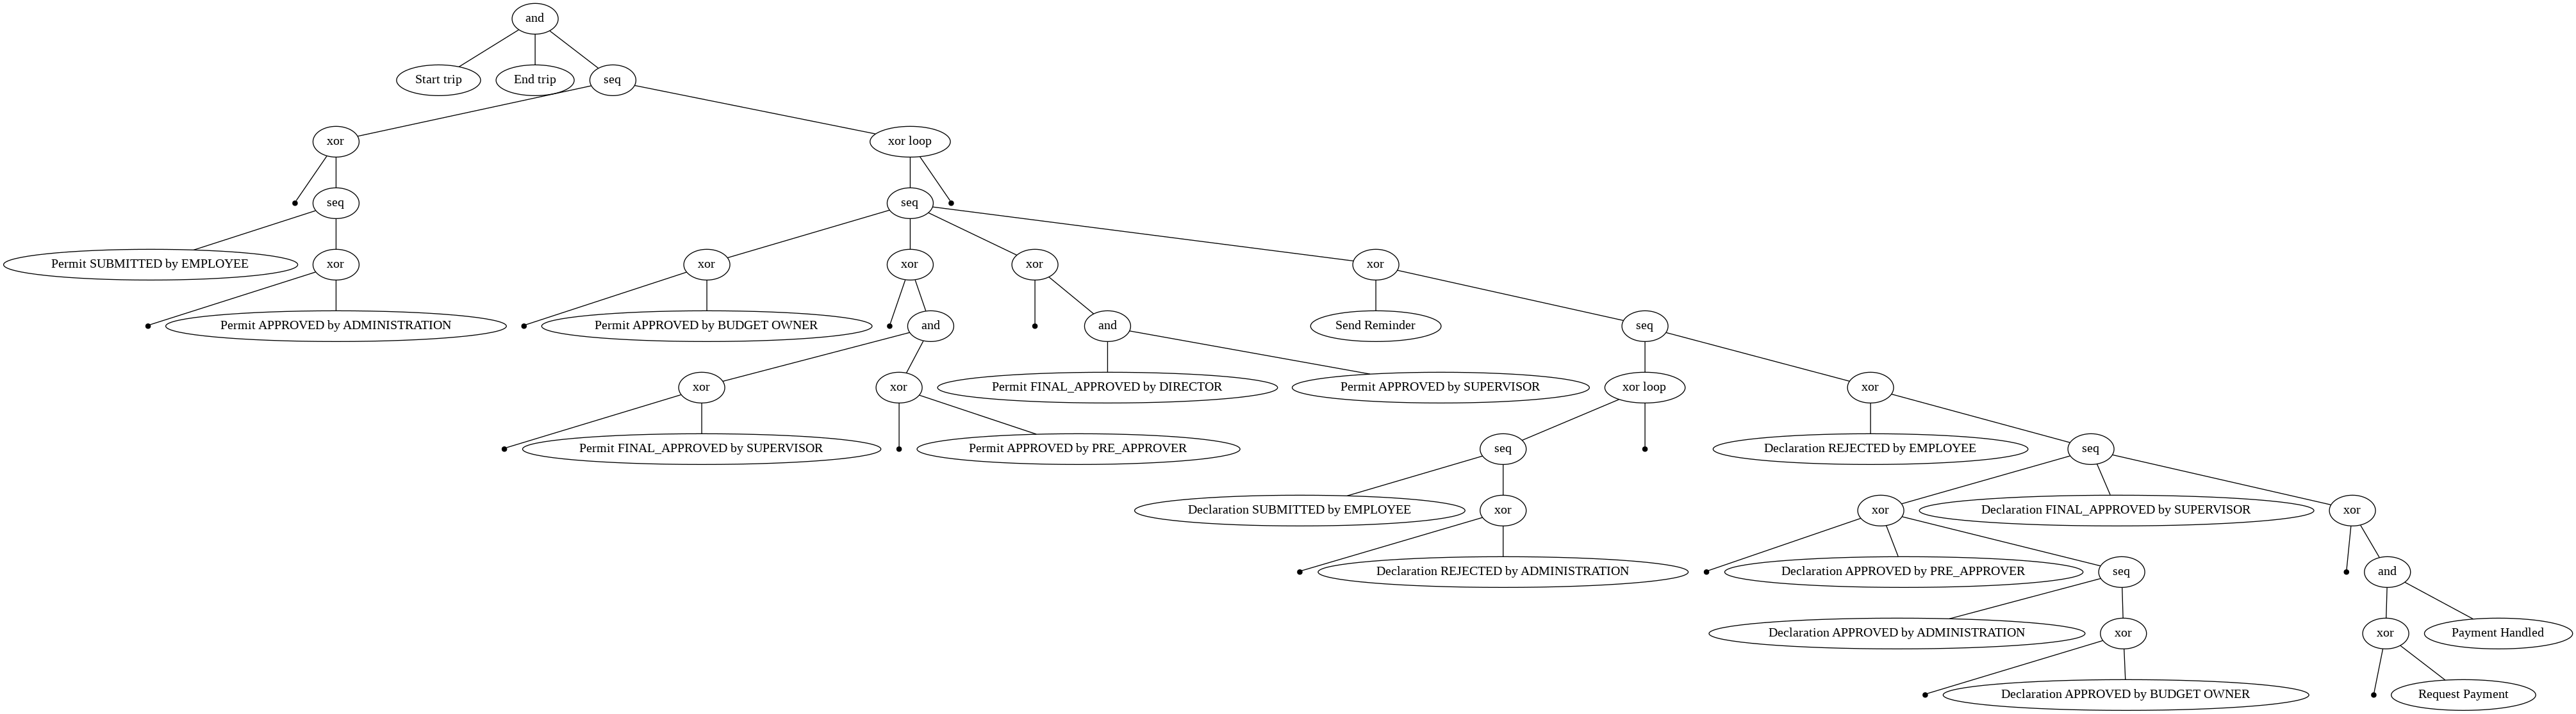

In [ ]:

from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

inductive_tree = inductive_miner.apply_tree(international_declarations_log_f)
_ = pt_visualizer.apply(inductive_tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(_)

<ipython-input-25-034793a3bfdb>:3: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  _ = pn_visualizer.apply(inductive, inductive_initial_marking, inductive_final_marking,


replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

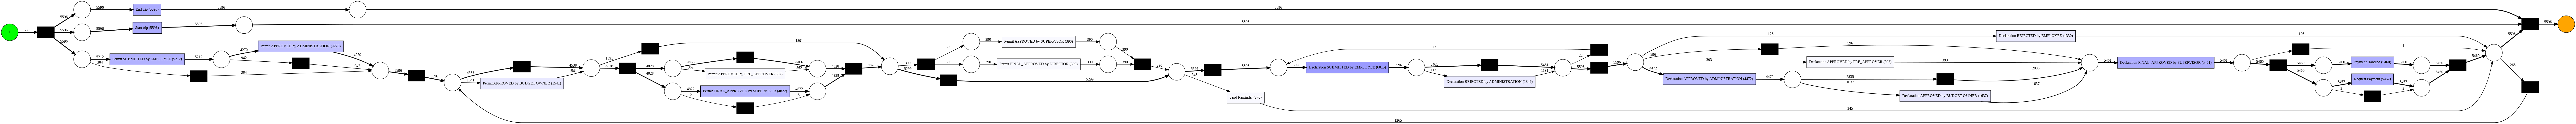

In [ ]:

from pm4py.objects.conversion.process_tree import converter as pt_converter
inductive, inductive_initial_marking, inductive_final_marking = pt_converter.apply(inductive_tree)
_ = pn_visualizer.apply(inductive, inductive_initial_marking, inductive_final_marking,
                          variant=pn_visualizer.Variants.FREQUENCY,
                          log=international_declarations_log_f)
pn_visualizer.view(_)

In [ ]:

fitness_inductive = replay_fitness_evaluator.apply(international_declarations_log_f, inductive, inductive_initial_marking,  inductive_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec_inductive = precision_evaluator.apply(international_declarations_log_f, inductive, inductive_initial_marking,  inductive_final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
gen_inductive = generalization_evaluator.apply(international_declarations_log_f, inductive, inductive_initial_marking,  inductive_final_marking)
simp_inductive = simplicity_evaluator.apply(inductive)
print(fitness_inductive)
print(prec_inductive)
print(gen_inductive)
print(simp_inductive)

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1900 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}
0.37131573927523753
0.9283272679291499
0.6470588235294118


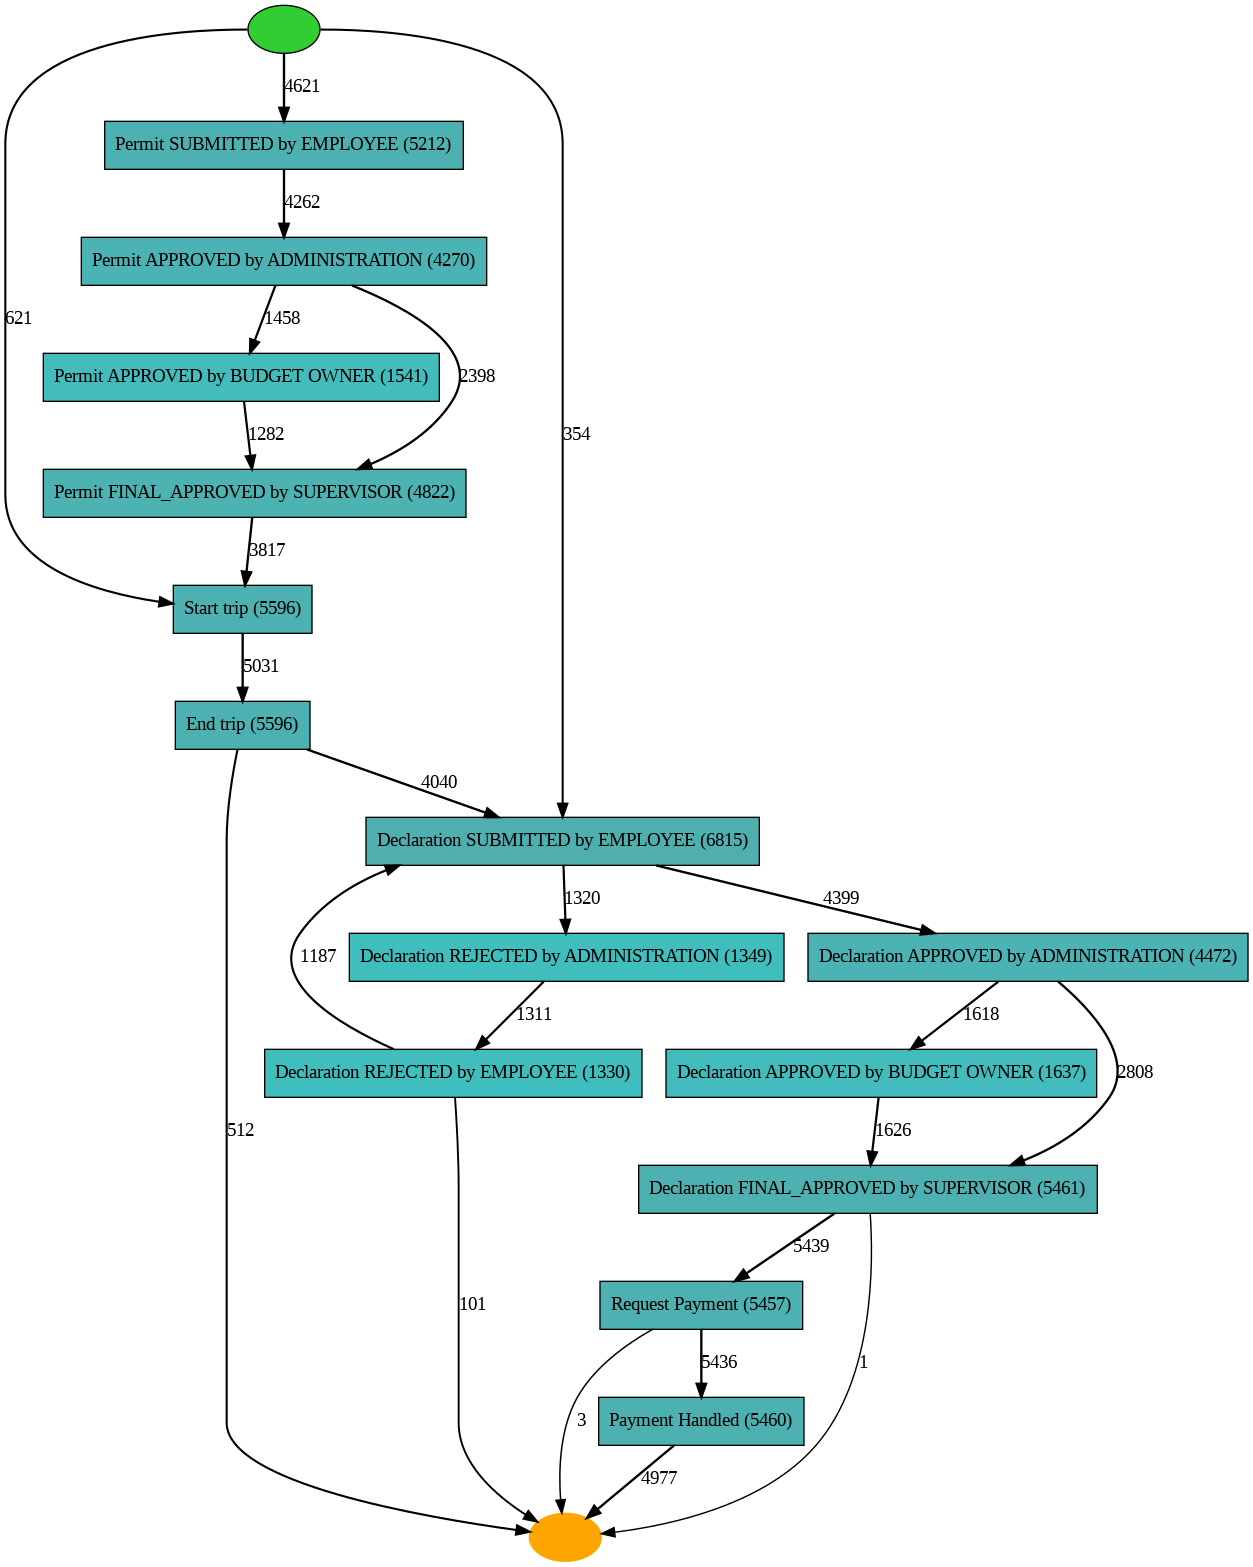

In [ ]:

from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heuristic = heuristics_miner.apply_heu(international_declarations_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.999
})
_ = hn_visualizer.apply(heuristic)
hn_visualizer.view(_)

<ipython-input-28-7f1417c17621>:2: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  _ = pn_visualizer.apply(heuristic, heuristic_initial_marking, heuristic_final_marking, log=international_declarations_log_f)


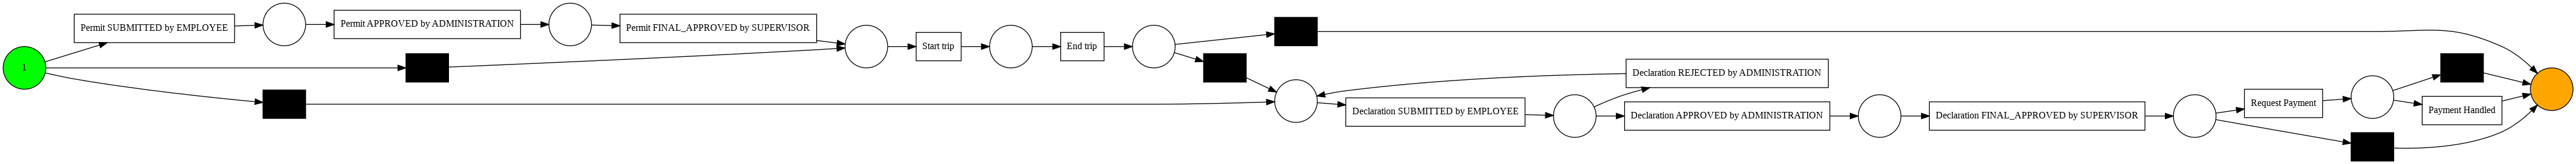

In [ ]:

heuristic, heuristic_initial_marking, heuristic_final_marking = heuristics_miner.apply(international_declarations_log_f, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99950})
_ = pn_visualizer.apply(heuristic, heuristic_initial_marking, heuristic_final_marking, log=international_declarations_log_f)
pn_visualizer.view(_)

In [ ]:

fitness_heu = replay_fitness_evaluator.apply(international_declarations_log_f, heuristic, heuristic_initial_marking, heuristic_final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
prec_heu = precision_evaluator.apply(international_declarations_log_f, heuristic, heuristic_initial_marking, heuristic_final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
gen_heu = generalization_evaluator.apply(international_declarations_log_f, heuristic, heuristic_initial_marking, heuristic_final_marking)
simp_heu = simplicity_evaluator.apply(heuristic)

print(fitness_heu)
print(prec_heu)
print(gen_heu)
print(simp_heu)

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/1900 [00:00<?, ?it/s]

replaying log with TBR, completed variants ::   0%|          | 0/388 [00:00<?, ?it/s]

{'perc_fit_traces': 52.43030736240171, 'average_trace_fitness': 0.9323696128411337, 'log_fitness': 0.9405187564390037, 'percentage_of_fitting_traces': 52.43030736240171}
0.9796667800068004
0.857006387118165
0.7435897435897437


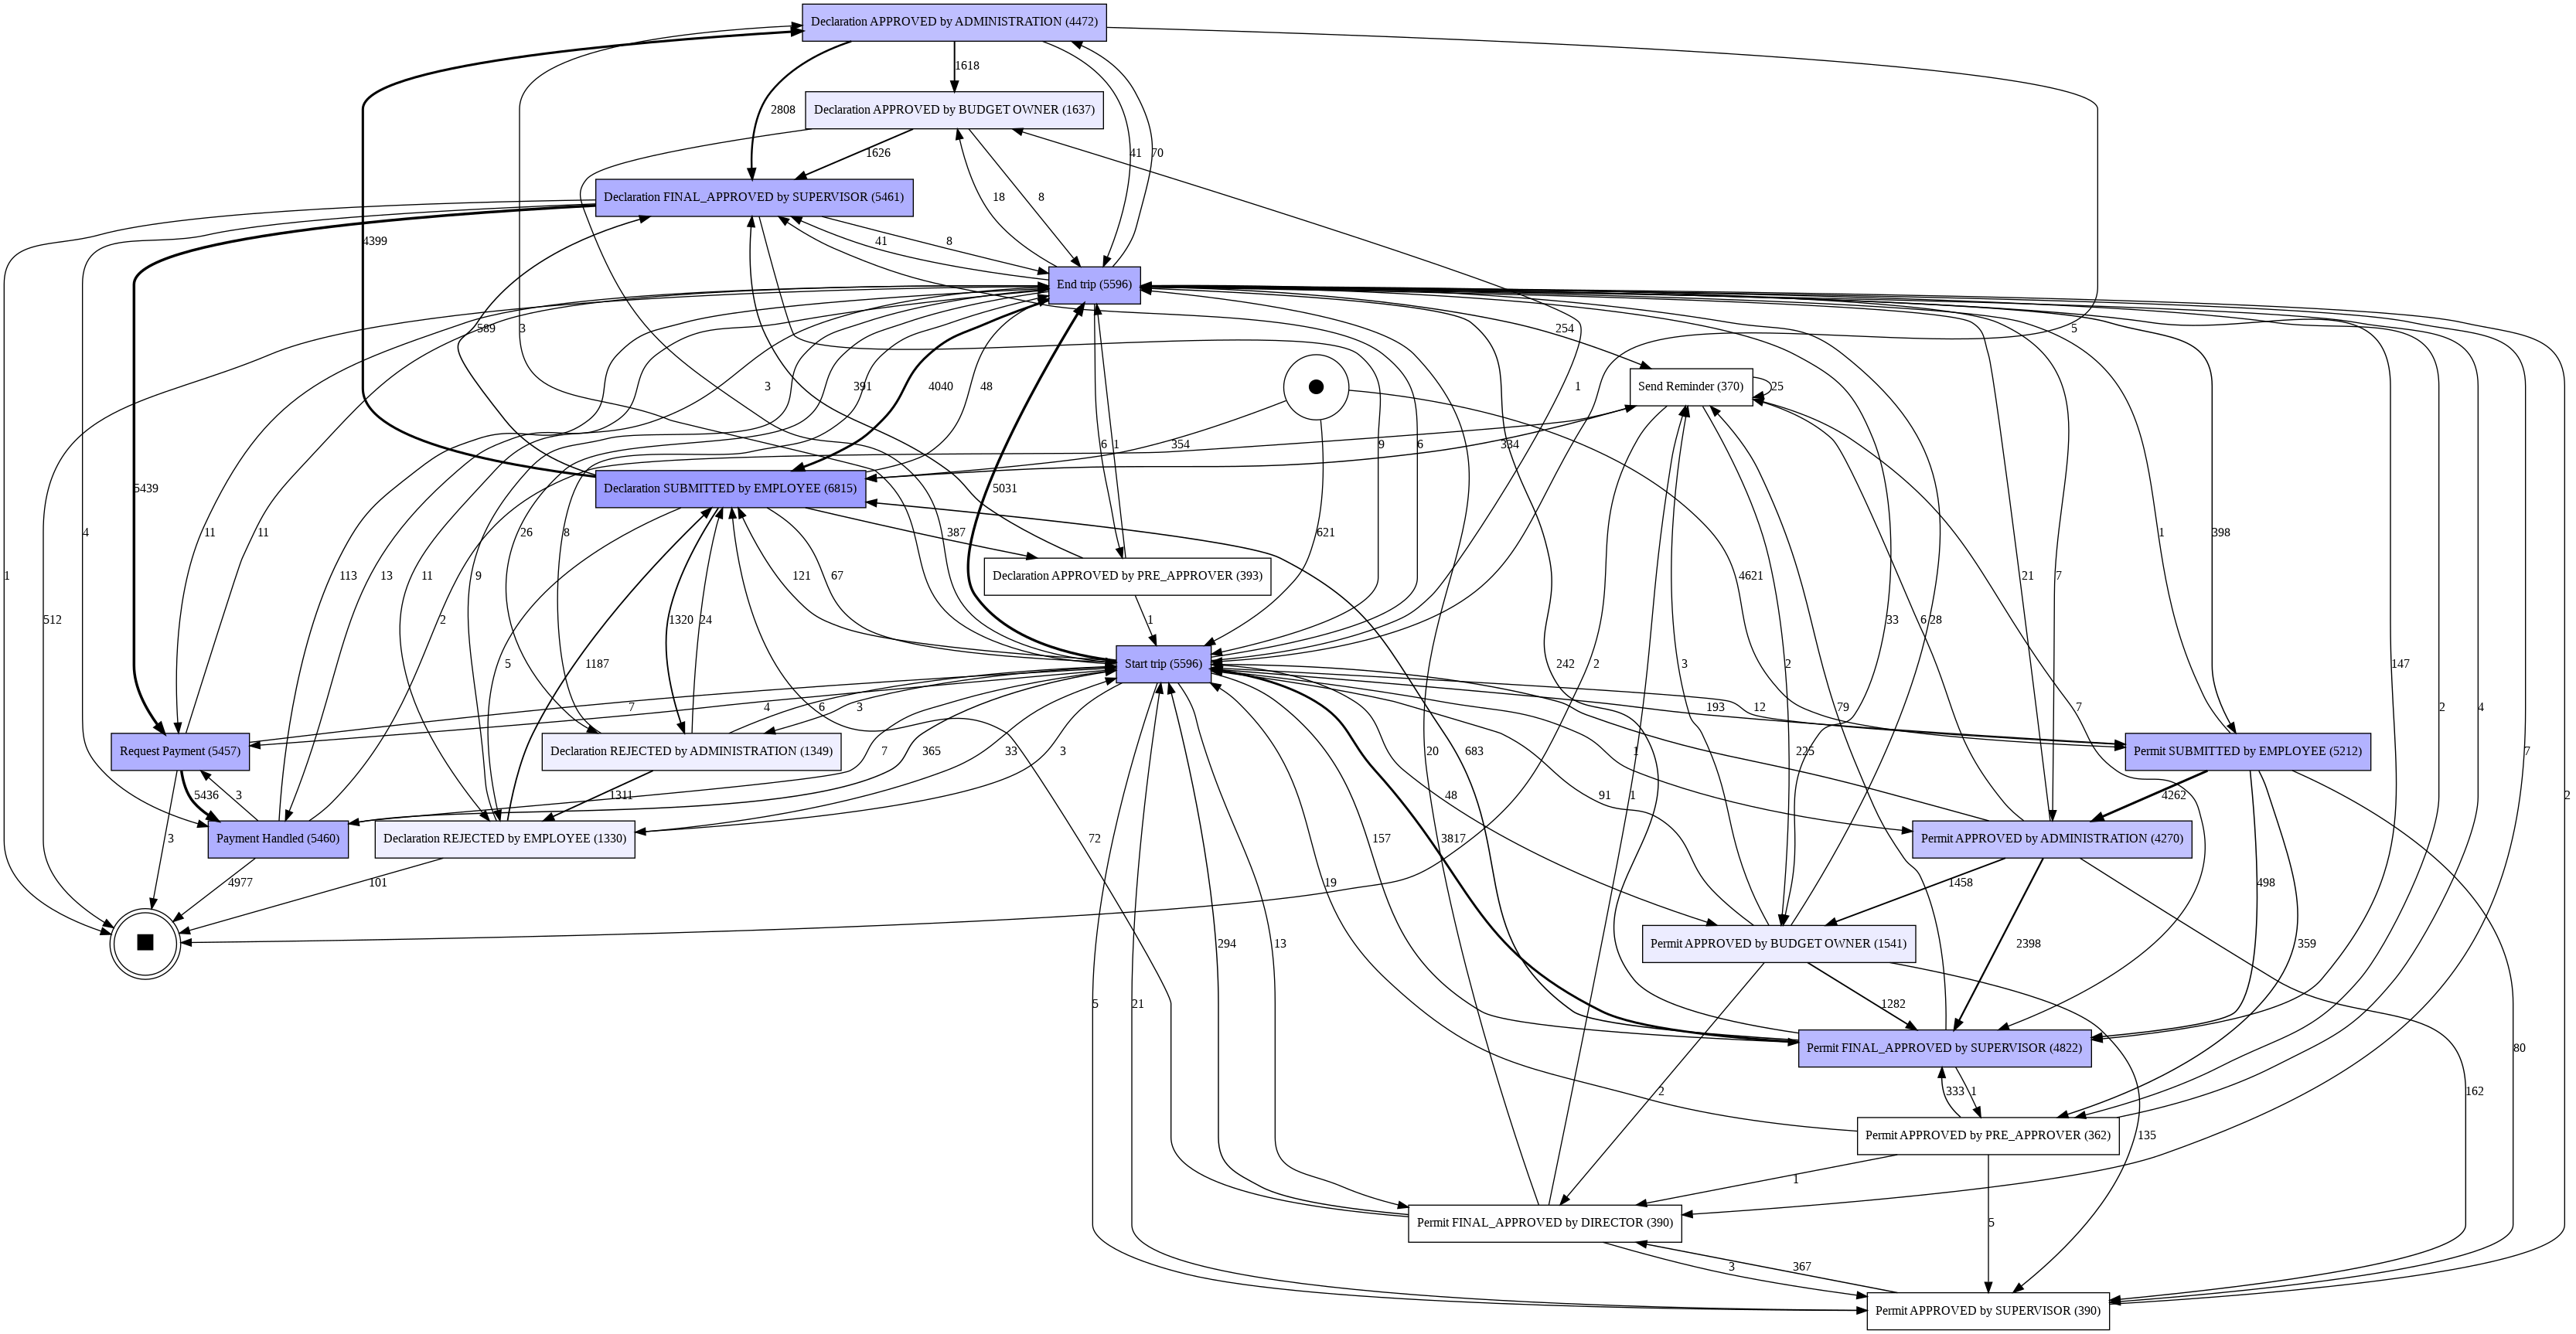

In [ ]:

dfg, start_activities, end_activities = pm4py.discover_dfg(international_declarations_log_f)
pm4py.view_dfg(dfg, start_activities, end_activities)

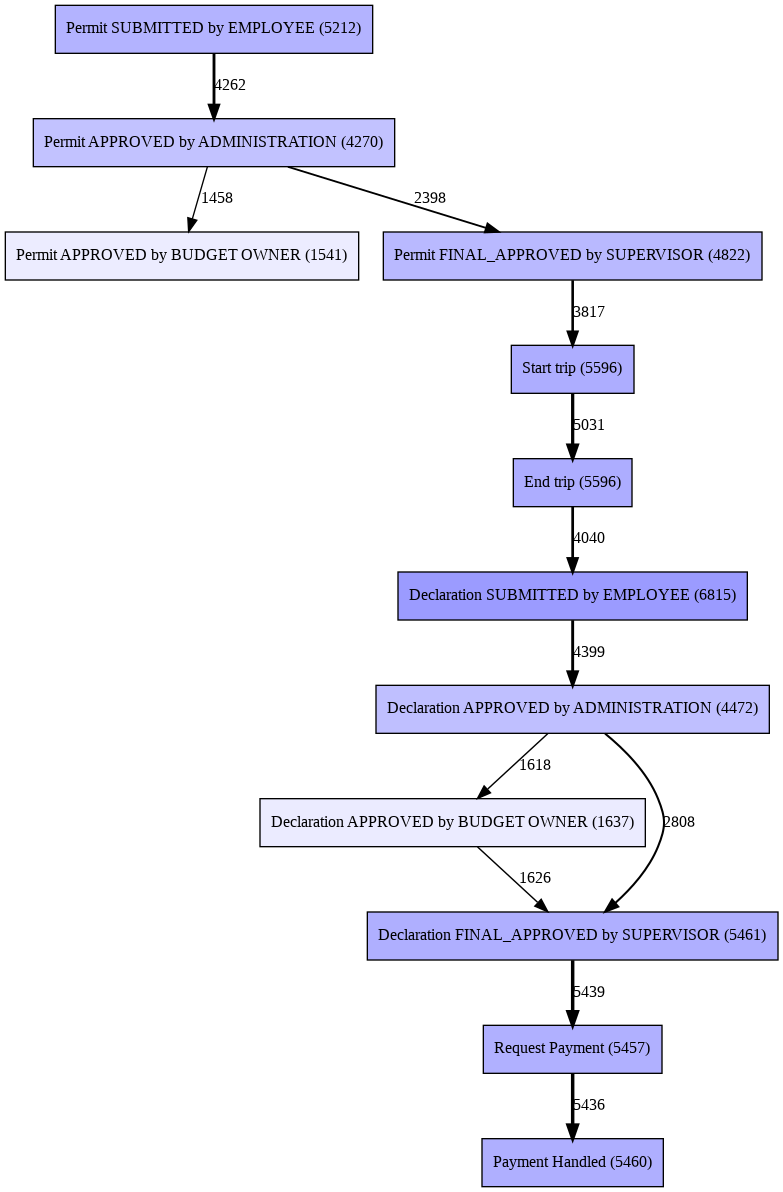

In [ ]:

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

dfg  = dfg_discovery.apply(international_declarations_log_f)
_ = dfg_visualization.apply(dfg, log=international_declarations_log_f, variant=dfg_visualization.Variants.FREQUENCY, parameters={dfg_visualization.Variants.FREQUENCY.value.Parameters.MAX_NO_EDGES_IN_DIAGRAM:12})
dfg_visualization.view(_)


In [ ]:

# Conformance Cheking
# Token-based replay matches a trace and a Petri net model,
# Alignment-based replay aims to find one of the best alignment between the trace and the model.

from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments

# Token-based replay matches a trace and a Petri net model,

replayed_traces = token_replay.apply(international_declarations_log, heuristic, heuristic_initial_marking, heuristic_final_marking)


print("REPLAY")
print("Number of traces", len(replayed_traces))
#print(replayed_traces)

#print("Case", idl[0].attributes['concept:name'])

anomalous_traces = []
i = 0
while i < len(replayed_traces):
	if replayed_traces[i]["trace_fitness"] < 1:
		anomalous_traces.append(international_declarations_log[i].attributes["concept:name"])
	i += 1
# print the list as a string
print(', '.join(map(str, anomalous_traces)))
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(replayed_traces))*100 , '%')

# Alignment-based replay aims to find one of the best alignment between the trace and the model.

aligned_traces = alignments.apply_log(international_declarations_log, heuristic, heuristic_initial_marking, heuristic_final_marking)
print("ALIGNMENTS")
print("Number of traces", len(aligned_traces))

#print(aligned_traces)

anomalous_traces = []
i = 0
while i < len(aligned_traces):
	if aligned_traces[i]["fitness"] != 1:
		anomalous_traces.append(international_declarations_log[i].attributes["concept:name"])
		#anomalous_traces.append(aligned_traces[i]['alignment'])
	i += 1
# print the list as a string
#print(', '.join(map(str, anomalous_traces)))
print(anomalous_traces)
print("Number of anomalous traces ", len(anomalous_traces))

print("Percentage of anomalous traces", (len(anomalous_traces)/len(aligned_traces))*100 , '%')
     

replaying log with TBR, completed variants ::   0%|          | 0/753 [00:00<?, ?it/s]

REPLAY
Number of traces 6449
declaration 76457, declaration 76667, declaration 73654, declaration 73596, declaration 73594, declaration 73592, declaration 73584, declaration 73578, declaration 73586, declaration 73580, declaration 73576, declaration 73566, declaration 73574, declaration 73572, declaration 73588, declaration 73590, declaration 73570, declaration 73564, declaration 73568, declaration 73582, declaration 72590, declaration 143637, declaration 74628, declaration 143644, declaration 72817, declaration 76810, declaration 76291, declaration 143578, declaration 76685, declaration 76038, declaration 74088, declaration 76299, declaration 73662, declaration 76308, declaration 76186, declaration 73012, declaration 73010, declaration 76318, declaration 143585, declaration 76549, declaration 143657, declaration 143598, declaration 143605, declaration 143664, declaration 73728, declaration 76197, declaration 73740, declaration 77110, declaration 76215, declaration 77880, declaration 7

aligning log, completed variants ::   0%|          | 0/753 [00:00<?, ?it/s]

ALIGNMENTS
Number of traces 6449
['declaration 76457', 'declaration 76667', 'declaration 73654', 'declaration 73596', 'declaration 73594', 'declaration 73592', 'declaration 73584', 'declaration 73578', 'declaration 73586', 'declaration 73580', 'declaration 73576', 'declaration 73566', 'declaration 73574', 'declaration 73572', 'declaration 73588', 'declaration 73590', 'declaration 73570', 'declaration 73564', 'declaration 73568', 'declaration 73582', 'declaration 72590', 'declaration 143637', 'declaration 74628', 'declaration 143644', 'declaration 72817', 'declaration 76810', 'declaration 76291', 'declaration 143578', 'declaration 76685', 'declaration 76038', 'declaration 74088', 'declaration 76299', 'declaration 73662', 'declaration 76308', 'declaration 76186', 'declaration 73012', 'declaration 73010', 'declaration 76318', 'declaration 143585', 'declaration 76549', 'declaration 143657', 'declaration 143598', 'declaration 143605', 'declaration 143612', 'declaration 143664', 'declaration